In [45]:
### 실습 1
from sklearn.datasets import load_diabetes
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
np.random.seed(42)


In [46]:
diabetes=load_diabetes()

In [47]:
df_x = diabetes.data
df_y = diabetes.target

In [48]:
from sklearn.model_selection import train_test_split

In [49]:
x_train,x_test,y_train,y_test = train_test_split(df_x,df_y)

In [50]:
## 모델 생성 및 training

class MyRegression():
    def __init__(self,input_dim,output_dim):
        self.W = np.random.rand(input_dim,output_dim)
        self.b = np.random.rand()
        
    def __call__(self,x):
        output = np.dot(x,self.W) + self.b
        return output.squeeze()

def mse(pred,y):
    return ((y-pred)**2).mean()

def train(model,x,y,lr,epochs, loss_fn):
    losses = []
    for epoch in range(epochs):
        pred = model(x)
        loss = loss_fn(pred.squeeze(),y)
        losses.append(loss)
        
        dW = np.expand_dims(2*np.dot(x.T,(pred-y_train))/pred.shape[0],axis=1)
        db = 2 * (pred - y).mean()
        
        model.W -= lr*dW
        model.b -= lr*db
    
    return losses

train_loss : 2935.7125415925534
test_loss : 2833.028104434729


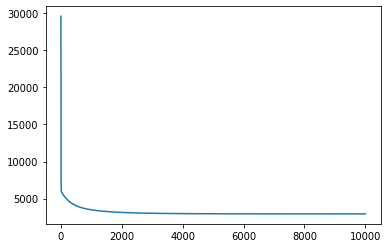

In [52]:
model = MyRegression(10,1)
losses = train(model,x_train,y_train,0.1,10000,mse)
test_loss = mse(model(x_test),y_test)

plt.plot(range(len(losses)),losses)

print("train_loss :", losses[-1])
print("test_loss :", test_loss)

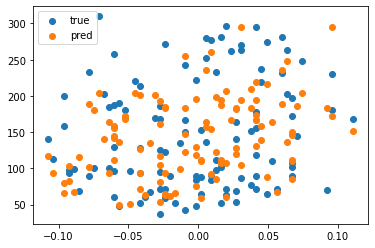

In [53]:
plt.scatter(x_test[:, 0], y_test, label="true")
plt.scatter(x_test[:, 0], model(x_test), label="pred")
plt.legend()
plt.show()

In [54]:
##실습2
import pandas as pd

train = pd.read_csv("~/data/data/bike-sharing-demand/train.csv")

In [55]:
train['datetime'] = pd.to_datetime(train['datetime'], format='%Y-%m-%d %H:%M:%S', errors='raise')

In [56]:
### 연,월,일,시,분,초 생성
train['year'] = train['datetime'].dt.year
train['month'] = train['datetime'].dt.month
train['day'] = train['datetime'].dt.day
train['hour'] = train['datetime'].dt.hour
train['minute'] = train['datetime'].dt.minute
train['second'] = train['datetime'].dt.second


<AxesSubplot:xlabel='second', ylabel='count'>

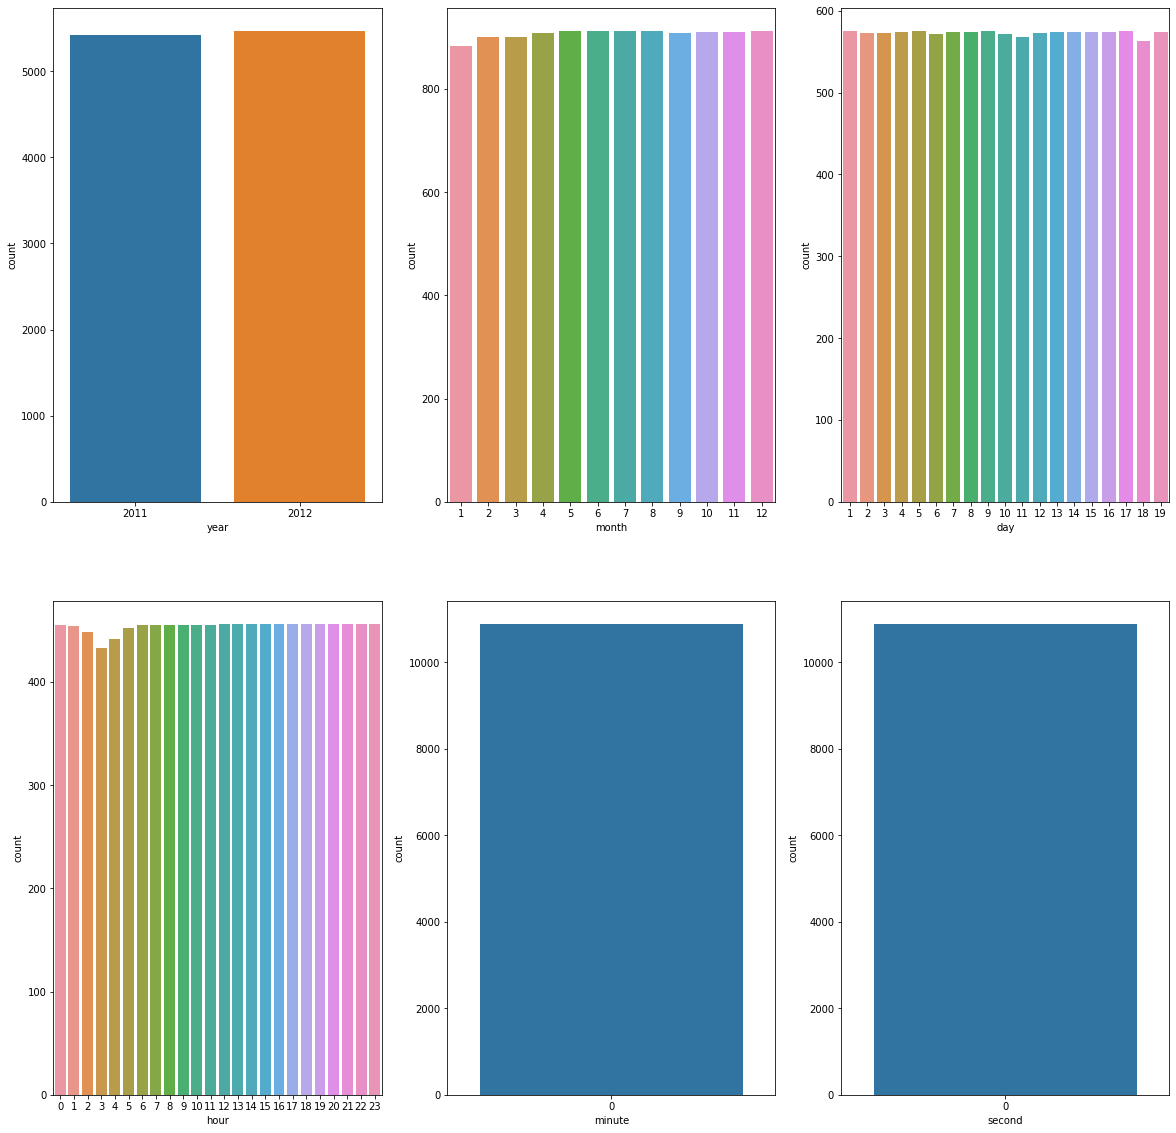

In [57]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure
fig, ax = plt.subplots(ncols=3,nrows=2,figsize=(20, 20))
sns.countplot(x=train["year"],ax=ax[0][0])
sns.countplot(x=train["month"],ax=ax[0][1])
sns.countplot(x=train["day"],ax=ax[0][2])
sns.countplot(x=train["hour"],ax=ax[1][0])
sns.countplot(x=train["minute"],ax=ax[1][1])
sns.countplot(x=train["second"],ax=ax[1][2])

In [58]:
train.keys()

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count',
       'year', 'month', 'day', 'hour', 'minute', 'second'],
      dtype='object')

In [59]:
## X, y 컬럼 선택 및 train/test 데이터 분리
from sklearn.model_selection import train_test_split
feature = ['season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered',
       'year', 'month', 'hour', 'minute', 'second', 'day']
target = ['count']
X_train,X_test,y_train,y_test = train_test_split(train[feature],train[target])


In [60]:
## 학습
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

reg = LinearRegression().fit(X_train, y_train)

In [61]:
## 오차 계산
mse = mean_squared_error(y_test,reg.predict(X_test))
rmse = mse**0.5
print(f"mse : {mse} rmse : {rmse}")

mse : 7.2048610284107335e-25 rmse : 8.488145279394512e-13


<AxesSubplot:xlabel='temp', ylabel='count'>

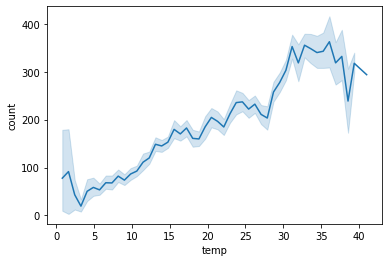

In [62]:
## 시각화
sns.lineplot(x=train['temp'], y=train['count'])

<AxesSubplot:xlabel='humidity', ylabel='count'>

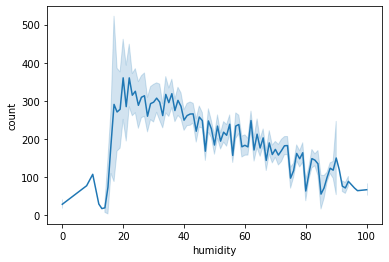

In [63]:
sns.lineplot(x=train['humidity'], y=train['count'])

In [ ]:
'''
실습1은 기초적인 역전파와 
선형회귀에 대한 이해를 할 수있는 좋은 예제 였고
실습 2시간 데이터를 다루어 볼 수 있는 좋은 기회였다.
'''